In [ ]:
#RAYAAN AGARWAL (c0887055)
# Step 1: Mounting the Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Step 2: Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, minmax_scale
import seaborn as sns
import pickle
%matplotlib inline

In [ ]:
# Step 3: Converting dataset to dataframe
df = pd.read_csv('/content/drive/MyDrive/AlgerianForestFire/Algerian_forest_fires_cleaned.csv')

In [ ]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:

# Step 4: Checking for the null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:
#Step 5: Checking for duplicate values 
df.duplicated().sum()

0

In [ ]:
#Step 6: Descriptive analysis
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [ ]:
#Step 7:  Encoding categorical values
mapping = {'fire   ': 1, 'not fire   ': 0}

# Step 8: Apply the mapping to the 'Classes' column
df['Classes_encoded'] = df['Classes'].map(mapping)

In [ ]:
print(df)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8   

     FWI       Classes  Reg

In [ ]:
# Step 9: Drop all NaN values from the 'Classes_encoded' column
df.dropna(subset=['Classes_encoded'], inplace=True)

In [ ]:
print(df)

     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
237   25      9  2012           28  70  15   0.0  79.9  13.8  36.1  2.4  14.1   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   

     FWI      Classes  Regi

In [ ]:
#Step 10:  Dropping the time metrics and string column
df_copy = df.drop(['day', 'month', 'year', 'Classes'], axis=1)

In [ ]:
print(df_copy)

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Region  \
0             29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5       0   
1             29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4       0   
2             26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1       0   
3             25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0       0   
4             27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5       0   
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...     ...   
237           28  70  15   0.0  79.9  13.8  36.1  2.4  14.1  3.0       1   
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5       1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0       1   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2       1   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7       1   

     Classes_encoded  
0                0.0  
1                0.0  
2                0

In [ ]:
# Step 11: Checking for null values
df_copy.isna().sum()

Temperature        0
RH                 0
Ws                 0
Rain               0
FFMC               0
DMC                0
DC                 0
ISI                0
BUI                0
FWI                0
Region             0
Classes_encoded    0
dtype: int64

In [ ]:
# Step 12: Keeping uniform datatype across all columns
df_copy = df_copy.astype(float)

In [ ]:

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 0 to 241
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      232 non-null    float64
 1   RH               232 non-null    float64
 2   Ws               232 non-null    float64
 3   Rain             232 non-null    float64
 4   FFMC             232 non-null    float64
 5   DMC              232 non-null    float64
 6   DC               232 non-null    float64
 7   ISI              232 non-null    float64
 8   BUI              232 non-null    float64
 9   FWI              232 non-null    float64
 10  Region           232 non-null    float64
 11  Classes_encoded  232 non-null    float64
dtypes: float64(12)
memory usage: 23.6 KB


<Axes: >

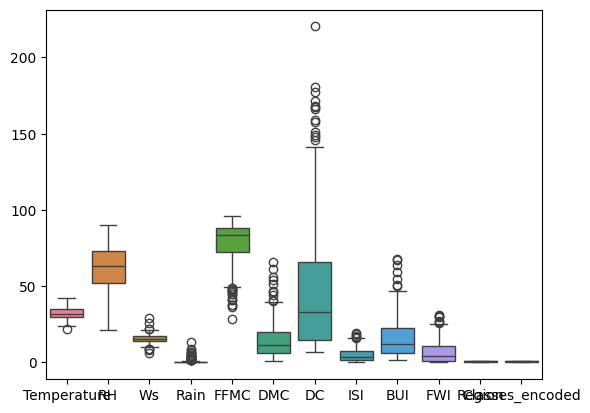

In [ ]:
# Step 13: Generating boxplot for visualizeing outliers
sns.boxplot(df_copy)

In [ ]:
# Step 14: Calcualting Q1, Q3 and IQR to handle outliers
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1

# Filter out outliers
df_copy = df_copy[~((df_copy < (Q1 - threshold * IQR)) | (df_copy > (Q3 + threshold * IQR))).any(axis=1)]

<Axes: >

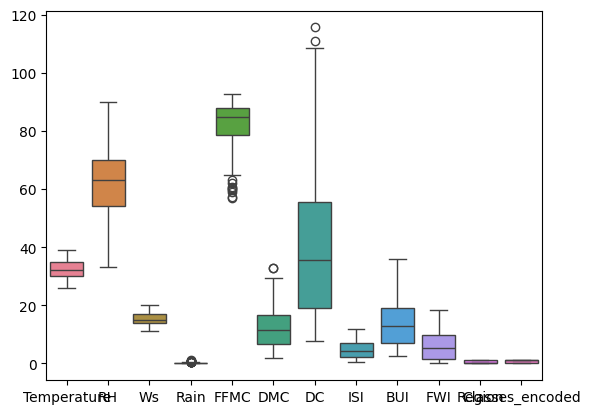

In [ ]:

# STep 15: Outliers handled
sns.boxplot(df_copy)

<Axes: >

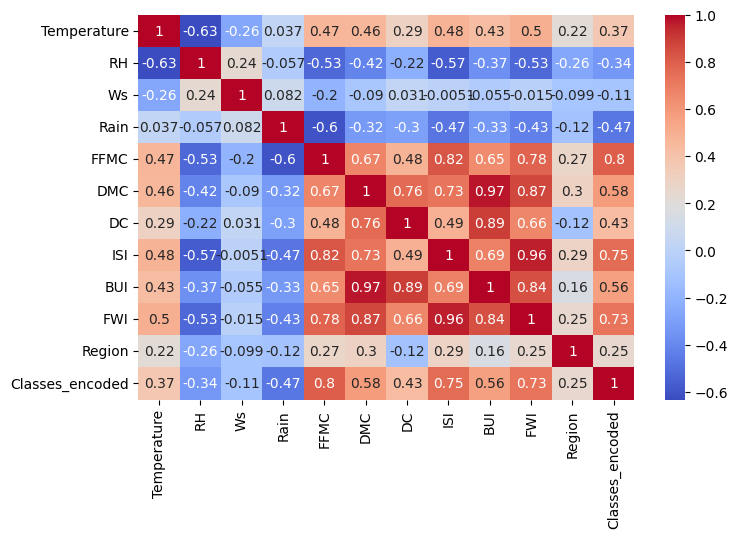

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=True)

In [ ]:
X = df_copy.drop(columns=['FWI'])
y = df_copy['FWI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

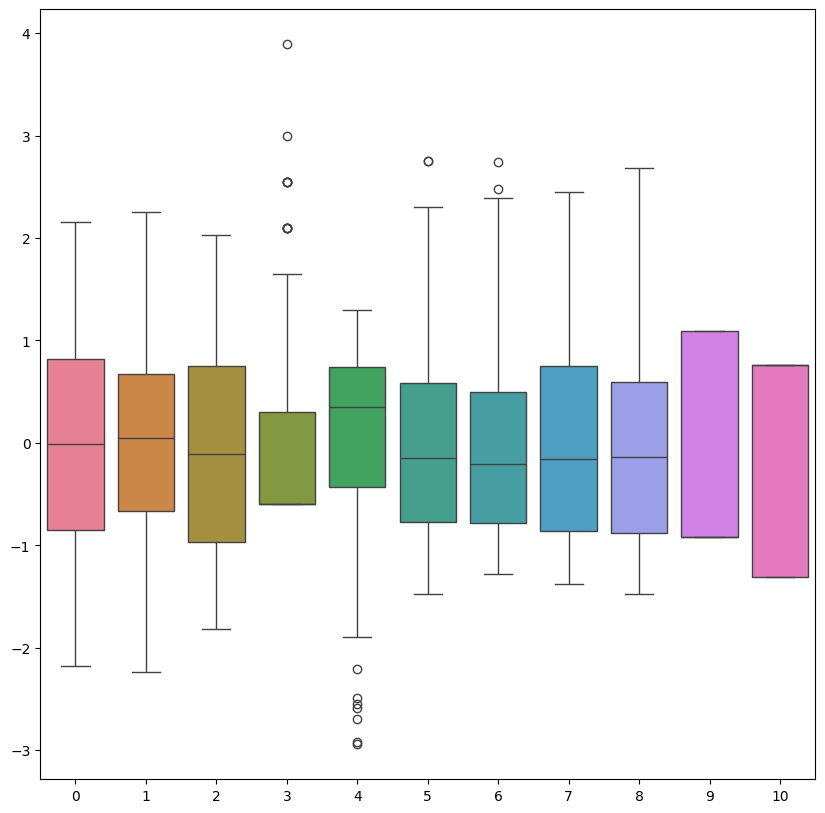

In [ ]:
#outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=X_train_scaled)
plt.show()

In [ ]:
lr_fire=LinearRegression()
lr_fire.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
lr_fire.coef_, lr_fire.intercept_

(array([ 0.11276741,  0.08314116, -0.04641894, -0.02438079, -0.70055477,
         0.20081159, -0.08185314,  4.04668157,  1.65943148, -0.04585707,
         0.14359178]),
 6.1614035087719285)

In [ ]:
y_pred = lr_fire.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse, mae, r2)

0.1213545218026528 0.27626383244161123 0.9940000286399581


In [ ]:
pickle.dump(lr_fire, open('lr_fire.pkl', 'wb'))

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))